In [ ]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
# movie dataset with genres and ratings
movies = {
    "Avengers": {"rating": 8.3, "genres": {"Action": 0.9, "Sci-Fi": 0.7}},
    "Titanic": {"rating": 7.8, "genres": {"Drama": 0.9}},
    "Captain Marvel": {"rating": 6.9, "genres": {"Action": 0.8, "Sci-Fi": 0.6}},
    "Iron Man": {"rating": 7.9, "genres": {"Action": 0.8, "Sci-Fi": 0.5}},
    "Fanaa": {"rating": 7.2, "genres": {"Drama": 0.8, "Romance": 0.9}},
    "Harry Potter": {"rating": 8.1, "genres": {"Fantasy": 0.9, "Adventure": 0.8}},
    "Diary of a Wimpy Kid": {"rating": 6.3, "genres": {"Comedy": 0.7, "Family": 0.8}},
    "Our Secret Diary": {"rating": 7.0, "genres": {"Drama": 0.6, "Romance": 0.7}},
    "12th Fail": {"rating": 8.0, "genres": {"Drama": 0.9, "Inspirational": 0.8}},
    "The Lord of the Rings": {"rating": 8.9, "genres": {"Fantasy": 1.0, "Adventure": 0.9}},
}

In [ ]:
# User-defined preferences for genres
user_preferences = {"Sci-Fi": 0.7, "Action": 0.6, "Drama": 0.3}

In [ ]:
# Calculate the recommendation score for a given movie
def recommendation_score(movie_name, preferences):
    movie_data = movies[movie_name]
    score = sum(
        preferences[genre] * movie_data["genres"].get(genre, 0)
        for genre in preferences
    )
    return score * movie_data["rating"]

In [ ]:
# Fitness function: Maximize total recommendation score
def fitness(solution):
    return sum(recommendation_score(movie, user_preferences) for movie in solution)

In [ ]:
# Generate initial random solution
def random_solution():
    return random.sample(movies.keys(), k=6)  # Recommend 6 movies

In [ ]:
# Generate a solution by swapping a movie
def neighbor_solution(solution):
    new_solution = solution[:]
    replace_idx = random.randint(0, len(solution) - 1)
    new_movie = random.choice([m for m in movies.keys() if m not in solution])
    new_solution[replace_idx] = new_movie
    return new_solution

In [ ]:
# Simulated Annealing Algorithm
def simulated_annealing(start_temp, end_temp, alpha):
    current_solution = random_solution()
    current_fitness = fitness(current_solution)
    temp = start_temp

    while temp > end_temp:
        new_solution = neighbor_solution(current_solution)
        new_fitness = fitness(new_solution)
        if new_fitness > current_fitness or random.random() < math.exp((new_fitness - current_fitness) / temp):
            current_solution, current_fitness = new_solution, new_fitness
        temp *= alpha  # Reduce temperature

    return current_solution, current_fitness

In [ ]:
# Run the algorithm
best_solution, best_fitness = simulated_annealing(start_temp=100, end_temp=0.01, alpha=0.95)

<ipython-input-6-2c00603417b7>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  return random.sample(movies.keys(), k=6)  # Recommend 6 movies


In [ ]:
# Display Results
print("Optimal Movie Recommendations:")
for movie in best_solution:
    print(f"- {movie} (Score: {recommendation_score(movie, user_preferences):.2f})")
print(f"Total Recommendation Score: {best_fitness:.2f}")

Optimal Movie Recommendations:
- Avengers (Score: 8.55)
- Captain Marvel (Score: 6.21)
- Fanaa (Score: 1.73)
- 12th Fail (Score: 2.16)
- Titanic (Score: 2.11)
- Iron Man (Score: 6.56)
Total Recommendation Score: 27.31


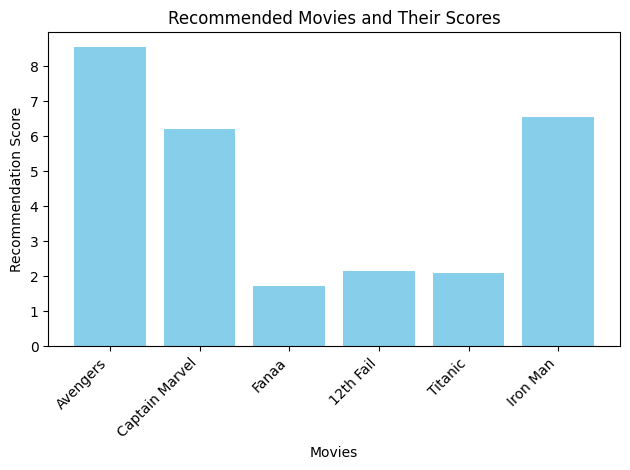

In [ ]:
# Bar Chart of Recommendation Scores
movie_scores = [recommendation_score(movie, user_preferences) for movie in best_solution]
plt.bar(best_solution, movie_scores, color="skyblue")
plt.xlabel("Movies")
plt.ylabel("Recommendation Score")
plt.title("Recommended Movies and Their Scores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()